In [23]:
import os,sys
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# sys.path.insert(
#     0,
#     '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/script/spatial_pipeline/lib/utils/'
# )
# from spatial.utils import getDefaultColors, removeBiasGenes, getDEG
from STutils.pl import getDefaultColors

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=50,dpi_save=300,facecolor='white',fontsize=12,vector_friendly=True,figsize=(3,3))
sc.settings.verbosity = 3

In [4]:
import yaml
with open('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/sample.yaml', 'r') as file:
    sample_dict = yaml.safe_load(file)

In [3]:
od = f'/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/8.6_Macro_region_celltype/'
os.system(f'mkdir -p {od}')
os.chdir(od)

In [5]:
adata = sc.read('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/1.1_cellbin_rawdata/filtered_data/merged_adata2.h5ad')

In [103]:
adata = sc.read('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/2.1_merge_big_cell_community/all_merged_adata.h5ad')

In [7]:
region_map = {
    "Tumor_Cell_region_1": 'TCR1',
    'Tumor_Cell_region_2': 'TCR2',
    'Tumor_Cell_region_3': 'TCR3',
    'Tumor_Cell_region_4': 'TCR4',
    'Tumor_around_region_1': 'TAR1',
    'Tumor_around_region_2': 'TAR2',
    'Tumor_around_region_3': 'TAR3',
    'Tumor_around_region_4': 'TAR4',
    'Tumor_around_region_5': 'TAR5',
    'Mesenchymal_Cell_region_1': 'MCR1',
    'Mesenchymal_Cell_region_2': 'MCR2',
    'Mesenchymal_Cell_region_3': 'MCR3',
    'ADM_region_1': 'ADR1',
    'ADM_region_2': 'ADR2',
    'ADM_region_3': 'ADR3',
    'ADM_region_4': 'ADR4',
    'Acinar_Cell_region':'ACR',
    'Immune_Cell_region':'ICR',
}
adata.obs['community_type'] = adata.obs['region'].map(region_map)
adata.obs['region'] = pd.Categorical(adata.obs['region'], categories=sorted(adata.obs['region'].unique()))

In [8]:
adata.obs['celltype'].value_counts()
adata = adata[adata.obs['celltype'] == 'Macrophage_Cell']

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [9]:
celltype_map = {
    'Macro_C3_NMF_11': 'Macro_C3',
    'Macro_CCR7_NMF_25': 'aDC_CCR7',
    'Macro_CD1A_NMF_5_6': 'iDC_CD1A',
    'Macro_CDKN1C_NMF_18': 'Macro_CDKN1C',
    'Macro_CPM_NMF_13': 'Macro_CPM',
    'Macro_CTRB2_NMF_10': 'Macro_CTRB2',
    'Macro_IL1R2_NMF_15': 'Macro_IL1R2',
    'Macro_NMF_3': 'Macro_NMF_3',
    'Macro_NMF_4': 'Macro_NMF_4',
    'Macro_PLTP_NMF_19': 'Macro_PLTP',
    'Macro_SPP1_NMF_7_23': 'Macro_SPP1',
    'Macro_TFF2_NMF_21': 'Macro_TFF2',
    'Macro_cycling_NMF_26': 'Macro_cycling'
}
adata.obs['cellsubtype'] = adata.obs['cellsubtype'].map(celltype_map)
adata.obs['cellsubtype'] = pd.Categorical(adata.obs['cellsubtype'], categories=sorted(adata.obs['cellsubtype'].unique(), key=lambda x: x[1:]))


/tmp/ipykernel_35998/756306539.py:16: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cellsubtype'] = adata.obs['cellsubtype'].map(celltype_map)


In [10]:
# replace adata.obs.columns by celltype_map dict
celltype_map = {
    'Macro_C3_NMF_11': 'Macro_C3',
    'Macro_CCR7_NMF_25': 'aDC_CCR7',
    'Macro_CD1A_NMF_5_6': 'iDC_CD1A',
    'Macro_CDKN1C_NMF_18': 'Macro_CDKN1C',
    'Macro_CPM_NMF_13': 'Macro_CPM',
    'Macro_CTRB2_NMF_10': 'Macro_CTRB2',
    'Macro_IL1R2_NMF_15': 'Macro_IL1R2',
    'Macro_NMF_3': 'Macro_NMF_3',
    'Macro_NMF_4': 'Macro_NMF_4',
    'Macro_PLTP_NMF_19': 'Macro_PLTP',
    'Macro_SPP1_NMF_7_23': 'Macro_SPP1',
    'Macro_TFF2_NMF_21': 'Macro_TFF2',
    'Macro_cycling_NMF_26': 'Macro_cycling'
}
adata.obs.columns = adata.obs.columns.to_series().replace(celltype_map)

/tmp/ipykernel_35998/4040560638.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_data.groupby(['region', 'cellsubtype'


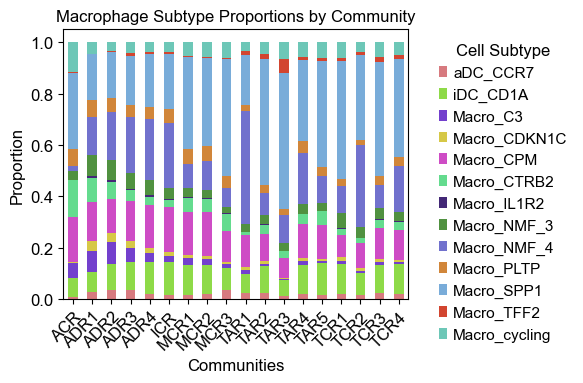

In [25]:
resolution = 'region'
#画community中cellsubtype比例图
filtered_data = adata.obs
# 按照 'region' 和 'celltype' 进行分组，并计算细胞数量
grouped = filtered_data.groupby(['region', 'cellsubtype'
                                    ]).size().unstack('cellsubtype').fillna(0)
proportions = grouped.divide(grouped.sum(axis=1), axis=0)
fig, axs = plt.subplots(figsize=(6, 4))
num_colors = len(proportions.columns)
color_palette = getDefaultColors(num_colors, type=10)
proportions.plot(kind='bar', stacked=True, ax=axs, color=color_palette)
axs.set_title("Macrophage Subtype Proportions by Community")
axs.set_xlabel("Communities")
axs.set_ylabel("Proportion")
axs.legend(title="Cell Subtype",
            bbox_to_anchor=(1.05, 1),
            loc='upper left')
axs.grid(False)
plt.setp(axs.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
fig.savefig(f"percent_cellsubtype_community_all2.pdf",
            bbox_inches="tight")


meta NOT subset; don't know how to subset; dropped


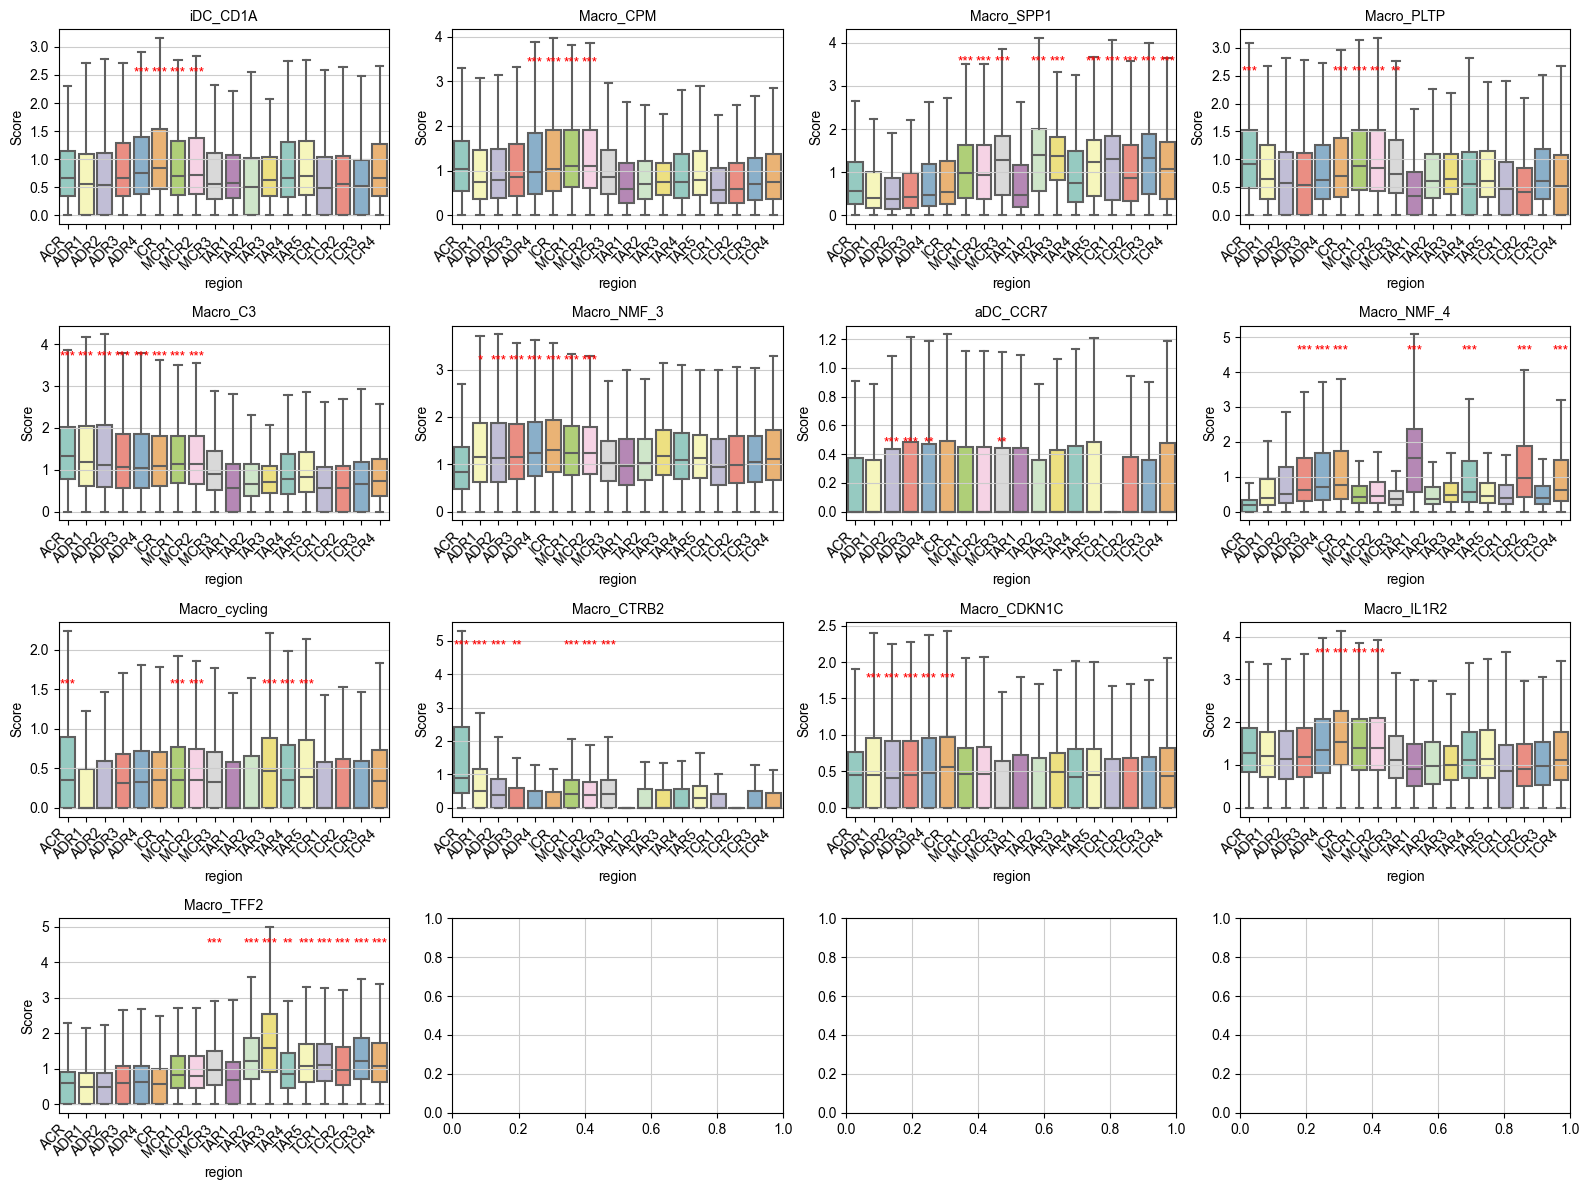

In [64]:
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import seaborn as sns
metadata = adata.obs
# remove the cells which max score - 2nd max score < 0.1
metadata['max_score'] = metadata[adata.obs['cellsubtype'].unique()].max(axis=1)
# metadata['2nd_max_score'] = metadata[adata.uns['celltypes'].tolist()].apply(lambda x: x.nlargest(2).iloc[-1], axis=1)
# metadata['max_score_diff'] = metadata['max_score'] - metadata['2nd_max_score']
metadata_filtered = metadata[metadata['max_score'] > metadata['max_score'].describe()['50%']]
grouping_column = "region"
fig, axs = plt.subplots(4, 4, figsize=(16, 14))
for i, column_to_analyze in enumerate(adata.obs['cellsubtype'].unique()):
    # Initialize a DataFrame to store the data
    data_df = pd.DataFrame(metadata_filtered[[column_to_analyze, grouping_column]])
    scaler = StandardScaler(with_mean=False)
    data_df[column_to_analyze] = scaler.fit_transform(data_df[[column_to_analyze]])
    t_test_sigs = {}
    t_test_results = {}
    group_labels = data_df[grouping_column].unique().sort_values()
    for group in group_labels:
        group_data = data_df[data_df[grouping_column] == group][column_to_analyze]
        other_groups = [other_group for other_group in group_labels if other_group != group]
        other_group_data = data_df[data_df[grouping_column].isin(other_groups)][column_to_analyze]
        _, p_val = ttest_ind(group_data, other_group_data, alternative="greater")
        if p_val < 0.05:
            if p_val < 0.001:
                stars = "***"
            elif p_val < 0.01:
                stars = "**"
            elif p_val < 0.05:
                stars = "*"            
            t_test_sigs[group] = stars
            t_test_results[group] = p_val
    axi = axs[i//4,i%4]
    sns.boxplot(data=data_df, x=grouping_column, y=column_to_analyze, palette="Set3",showfliers=False,ax=axi)    
    axi.set_xticklabels(group_labels,rotation=45, ha='right', rotation_mode='anchor')
    y_min, y_max = axi.get_ylim()
    for group, stars in t_test_sigs.items():
        x_pos = group_labels.tolist().index(group)
        axs[i//4,i%4].text(x_pos, y_max - 0.85, s=stars, color='red',ma='center',ha='center')
    # Set plot labels
    axi.set_xlabel(grouping_column)
    axi.set_ylabel('Score')
    axi.set_title(column_to_analyze)
fig.savefig(f"Macrophage_subtype_region_boxplot.pdf")
    

In [28]:
adata.obs['celltype'].value_counts()

celltype
Macrophage_Cell    139688
Name: count, dtype: int64

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

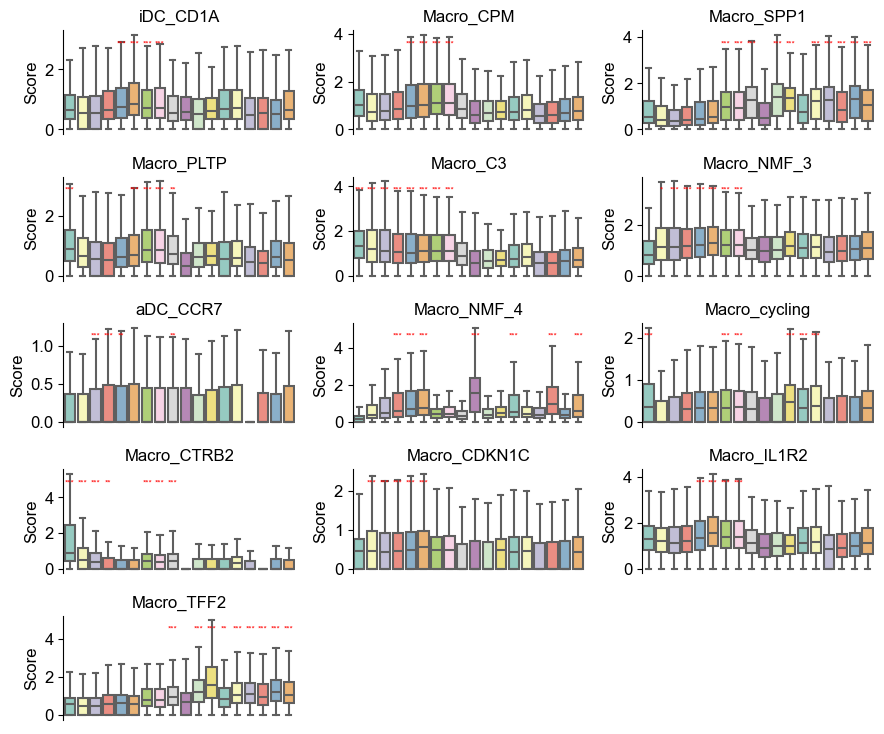

In [30]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import pandas as pd


metadata = adata.obs
# remove the cells which max score - 2nd max score < 0.1
metadata["max_score"] = metadata[adata.obs["cellsubtype"].unique()].max(axis=1)
# metadata['2nd_max_score'] = metadata[adata.uns['celltypes'].tolist()].apply(lambda x: x.nlargest(2).iloc[-1], axis=1)
# metadata['max_score_diff'] = metadata['max_score'] - metadata['2nd_max_score']
metadata_filtered = metadata[metadata["max_score"] > metadata["max_score"].describe()["50%"]]

grouping_column = "region"

# Define the GridSpec layout
gs = gridspec.GridSpec(5, 3)

fig = plt.figure(figsize=(9, 7.5))

for i, column_to_analyze in enumerate(adata.obs["cellsubtype"].unique()):
    # Initialize a DataFrame to store the data
    data_df = pd.DataFrame(metadata_filtered[[column_to_analyze, grouping_column]])
    scaler = StandardScaler(with_mean=False)
    data_df[column_to_analyze] = scaler.fit_transform(data_df[[column_to_analyze]])
    # softmax transform
    # data_df[column_to_analyze] = np.exp(data_df[column_to_analyze]) / np.exp(data_df[column_to_analyze]).sum()
    t_test_sigs = {}
    t_test_results = {}
    group_labels = data_df[grouping_column].unique().sort_values()
    for group in group_labels:
        group_data = data_df[data_df[grouping_column] == group][column_to_analyze]
        other_groups = [other_group for other_group in group_labels if other_group != group]
        other_group_data = data_df[data_df[grouping_column].isin(other_groups)][column_to_analyze]
        _, p_val = ttest_ind(group_data, other_group_data, alternative="greater")
        if p_val < 0.05:
            if p_val < 0.001:
                stars = "***"
            elif p_val < 0.01:
                stars = "**"
            elif p_val < 0.05:
                stars = "*"
            t_test_sigs[group] = stars
            t_test_results[group] = p_val

    # Create a subplot in the GridSpec layout
    axi = plt.subplot(gs[i // 3, i % 3])
    sns.boxplot(data=data_df, x=grouping_column, y=column_to_analyze, palette="Set3", showfliers=False, ax=axi)
    axi.set_xticklabels(axi.get_xticklabels(), rotation=45, ha="right")
    y_min, y_max = axi.get_ylim()
    for group, stars in t_test_sigs.items():
        x_pos = group_labels.tolist().index(group)
        axi.text(x_pos, y_max * 0.85, s=stars, color="red", ma="center", ha="center",fontsize=6)

    # Remove the x-axis and text
    axi.set_xticks([])
    axi.set_xlabel("")

    # Set the title with a box around it
    axi.set_title(column_to_analyze)
    # Remove the y-axis grid
    axi.grid(False, axis="y")
    # Remove the box around the subplot
    axi.spines["right"].set_visible(False)
    axi.spines["top"].set_visible(False)
    axi.spines["bottom"].set_visible(False)
    # # Set plot labels
    # axi.set_xlabel(grouping_column)
    axi.set_ylabel("Score")

    # Add the title as a row annotation
    # fig.text(0, (i + 0.5) / len(celltypes), column_to_analyze, ha="left", va="center")

# Save the figure
fig.savefig("Macrophage_subtype_region_boxplot2.pdf")

In [107]:
# gene set AUC score
from ctxcore.genesig import GeneSignature
CAF_sig = GeneSignature.from_gmt('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/database/signature/immune.gmt')
from pyscenic.aucell import aucell
exp_mtx = pd.DataFrame(adata.X.toarray(),index=adata.obs_names,columns=adata.var_names)
auc_mtx_CAF = aucell(exp_mtx, CAF_sig, noweights=True, num_workers=20)
# remove columns with all 0
all_zero_columns = auc_mtx_CAF.columns[auc_mtx_CAF.eq(0).all()]

# Drop the columns with all zeros from the DataFrame
auc_mtx_CAF_filtered = auc_mtx_CAF.drop(columns=all_zero_columns, inplace=False)
adata.obs[auc_mtx_CAF_filtered.columns] = auc_mtx_CAF_filtered.fillna(0)


Less than 80% of the genes in class_I are present in the expression matrix.
Less than 80% of the genes in class_II are present in the expression matrix.
Less than 80% of the genes in Exhaustion are present in the expression matrix.
Less than 80% of the genes in aDCs are present in the expression matrix.
Less than 80% of the genes in pDCs are present in the expression matrix.
Less than 80% of the genes in Mast_cells are present in the expression matrix.
Less than 80% of the genes in NK_cells are present in the expression matrix.
Less than 80% of the genes in Tfh are present in the expression matrix.
Less than 80% of the genes in Th1_cells are present in the expression matrix.
Less than 80% of the genes in Th2_cells are present in the expression matrix.
Less than 80% of the genes in APC_co_inhibition are present in the expression matrix.
Less than 80% of the genes in CCR are present in the expression matrix.
Less than 80% of the genes in Inflammation_promoting are present in the expressi

In [102]:
auc_mtx_CAF.eq(0).all()

Regulon
class_I                    True
class_II                   True
CoStimulatory             False
Cytotoxic                 False
Exhaustion                 True
DCs                       False
aDCs                       True
iDCs                      False
pDCs                       True
Macrophages               False
Mast_cells                 True
Neutrophils               False
Macro_M1                  False
Macro_M2                   True
Bcells                    False
Plasma                    False
NK_cells                   True
TIL                       False
Tfh                        True
Th1_cells                  True
Th2_cells                  True
Treg                      False
APC_co_inhibition          True
APC_co_stimulation        False
CCR                        True
Check_point               False
Cytolytic_activity        False
HLA                        True
Inflammation_promoting     True
MHC_class_I                True
Parainflammation          False


/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
meta NOT subset; don't know how to subset; dropped
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


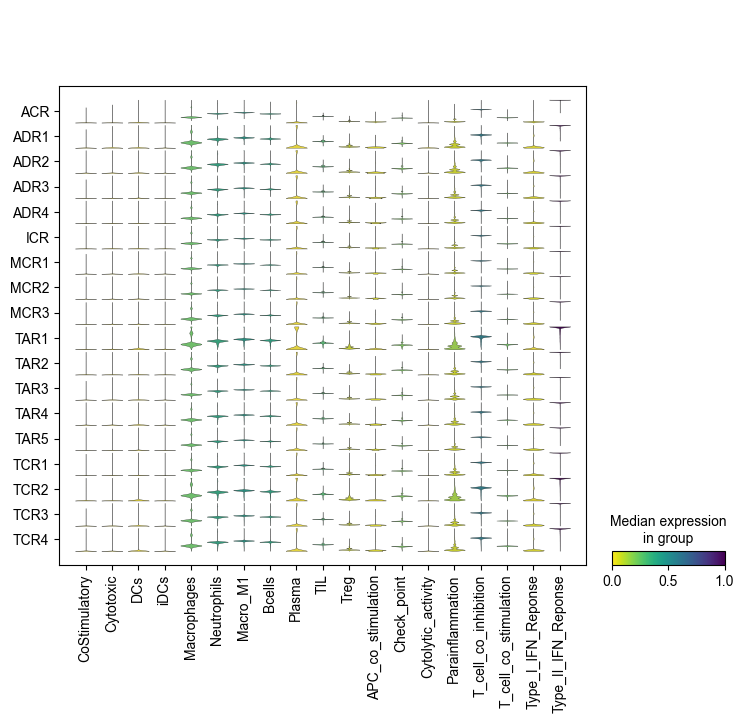

In [101]:
sc.pl.stacked_violin(adata, auc_mtx_CAF_filtered.columns, groupby='region',standard_scale='obs',swap_axes=True,cmap='viridis_r', save=f"immune_signature.pdf")

In [97]:
auc_mtx_CAF_filtered.shape

(139688, 19)

In [68]:
adata.write('Macriphage_big_cell.h5ad')

meta NOT subset; don't know how to subset; dropped


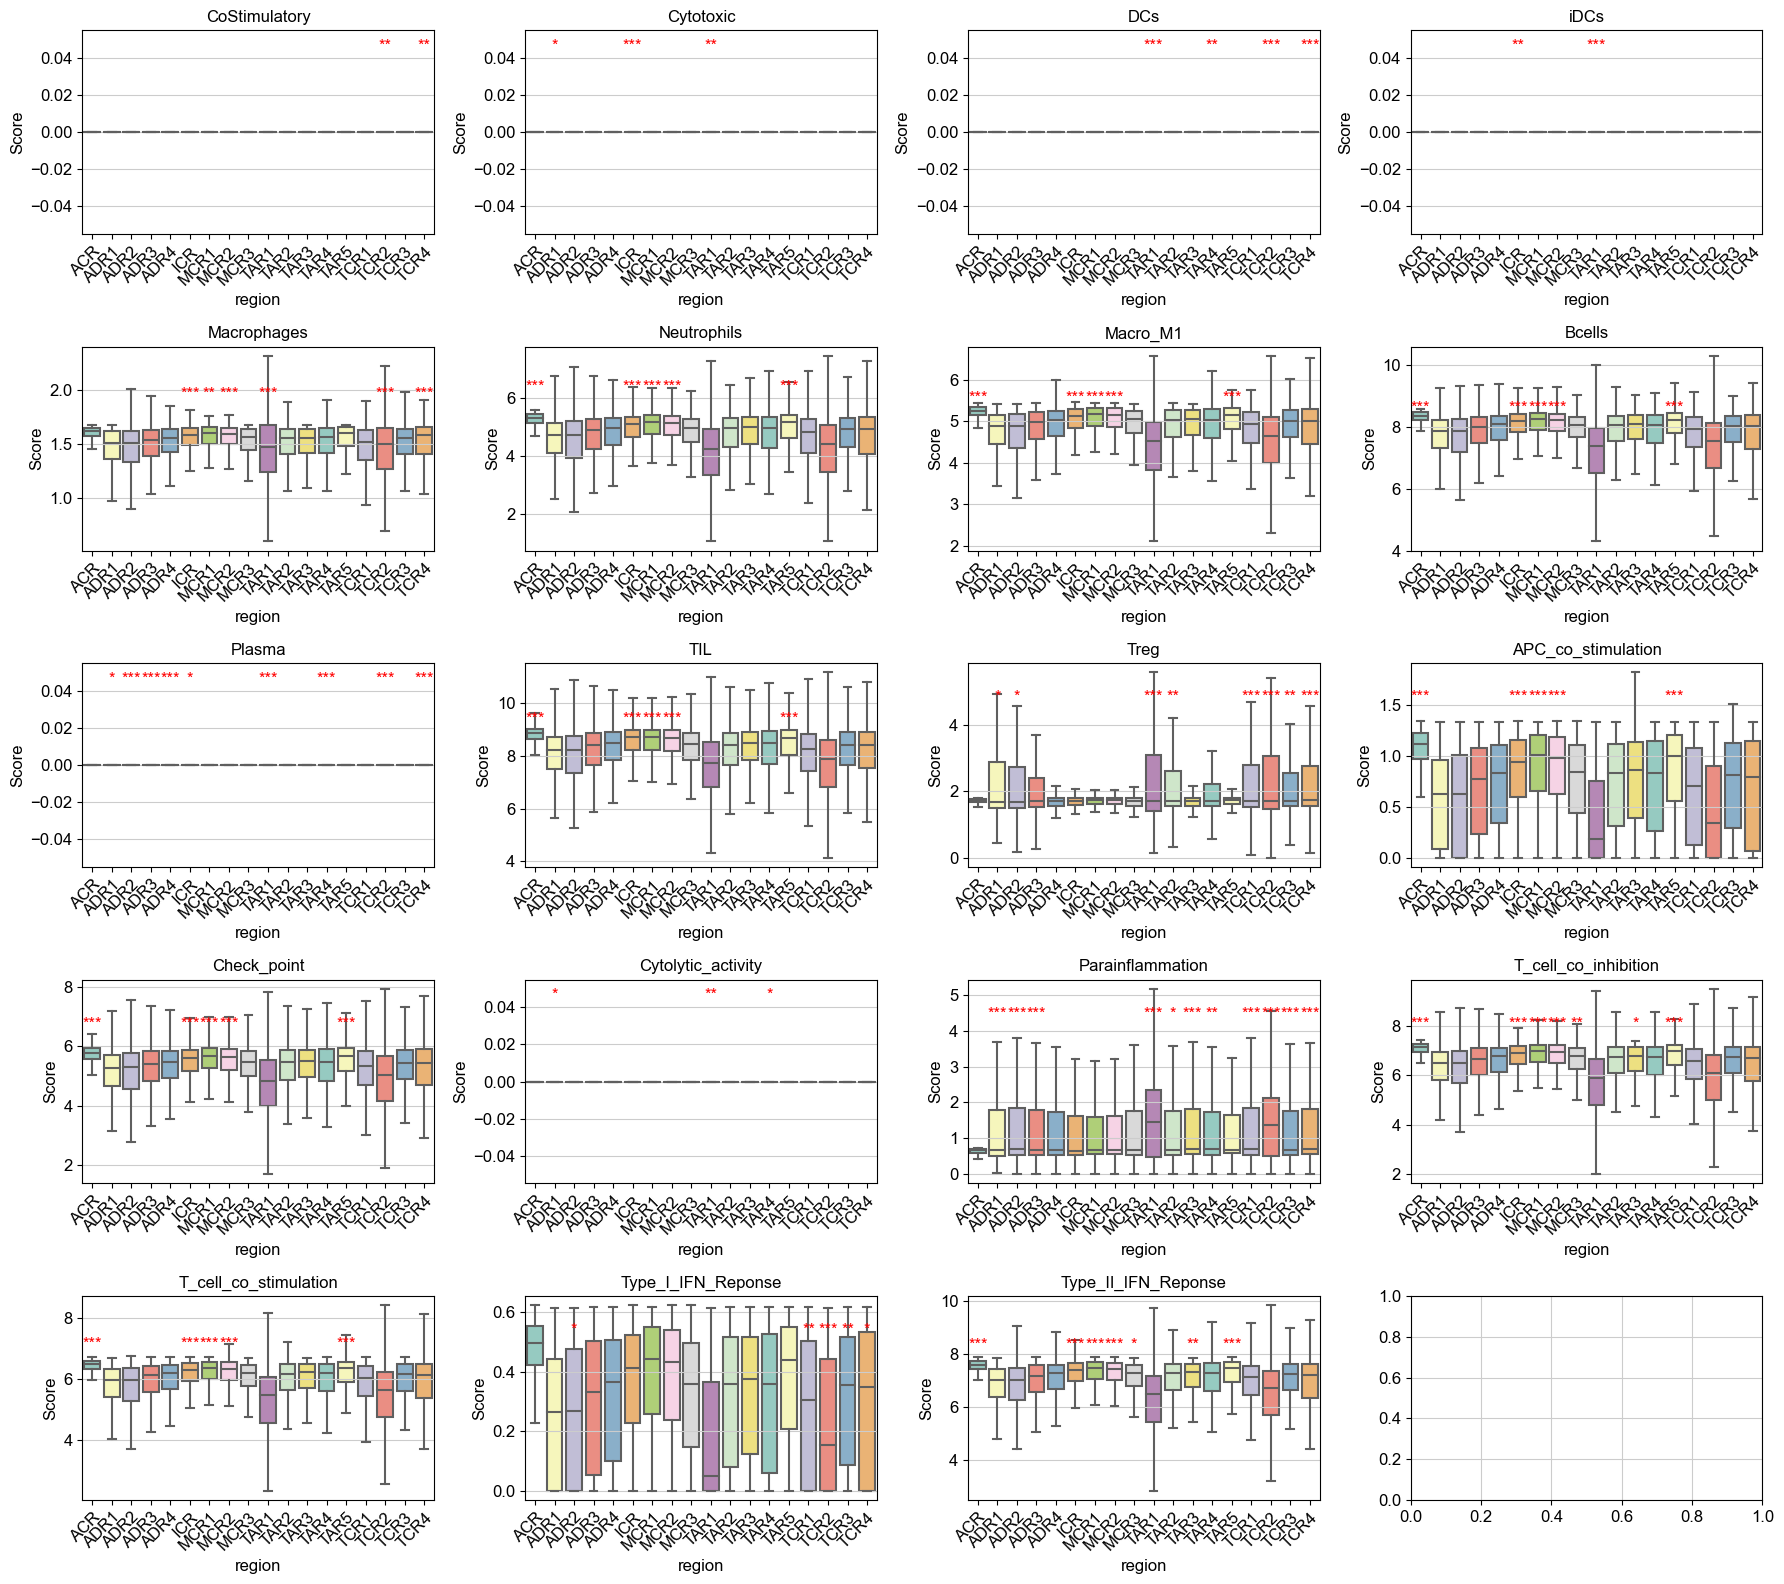

In [96]:
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont
Image.MAX_IMAGE_PIXELS = None
metadata = adata.obs
metadata['max_score'] = metadata[adata.obs['cellsubtype'].unique()].max(axis=1)
# metadata['2nd_max_score'] = metadata[adata.uns['celltypes'].tolist()].apply(lambda x: x.nlargest(2).iloc[-1], axis=1)
# metadata['max_score_diff'] = metadata['max_score'] - metadata['2nd_max_score']
metadata_filtered = metadata[metadata['max_score'] > metadata['max_score'].describe()['50%']]
# remove the cells which max score - 2nd max score < 0.1
grouping_column = "region"
fig, axs = plt.subplots(5, 4, figsize=(18, 16))
for i, column_to_analyze in enumerate(auc_mtx_CAF_filtered.columns):
    # Initialize a DataFrame to store the data
    data_df = pd.DataFrame(metadata[[column_to_analyze, grouping_column]])
    scaler = StandardScaler(with_mean=False)
    data_df[column_to_analyze] = scaler.fit_transform(data_df[[column_to_analyze]])
    t_test_sigs = {}
    t_test_results = {}
    group_labels = data_df[grouping_column].unique().sort_values()
    for group in group_labels:
        group_data = data_df[data_df[grouping_column] == group][column_to_analyze]
        other_groups = [other_group for other_group in group_labels if other_group != group]
        other_group_data = data_df[data_df[grouping_column].isin(other_groups)][column_to_analyze]
        _, p_val = ttest_ind(group_data, other_group_data, alternative="greater")
        if p_val < 0.05:
            if p_val < 0.001:
                stars = "***"
            elif p_val < 0.01:
                stars = "**"
            elif p_val < 0.05:
                stars = "*"            
            t_test_sigs[group] = stars
            t_test_results[group] = p_val
    axi = axs[i//4,i%4]
    sns.boxplot(data=data_df, x=grouping_column, y=column_to_analyze, palette="Set3",showfliers=False,ax=axi)
    axi.set_xticklabels(group_labels,rotation=45, ha="right", rotation_mode='anchor')
    y_min, y_max = axi.get_ylim()
    for group, stars in t_test_sigs.items():
        x_pos = group_labels.tolist().index(group)
        axi.text(x_pos, y_max * 0.8, s=stars, color='red',ma='center',ha='center')
    # Set plot labels
    axi.set_xlabel(grouping_column)
    axi.set_ylabel('Score')
    axi.set_title(column_to_analyze)
fig.savefig(f"Immune_signature_region_boxplot.pdf")
